In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/Users/jein/env/env/online_food_delivery/cleaned_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (72267, 25)


,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,Order_Time,Delivery_Time_Min,Distance_km,Order_Value,Discount_Applied,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
0,ORD000001,CUST6948,19.0,Male,NaN,Central,RES936,Restaurant_29,Chinese,10/20/2024,0:00,187.0,15.75,1197.0,NaN,NaN,UPI,Delivered,NaN,DP563,5.0,4.4,Weekend,True,0.13
1,ORD000002,CUST6515,NaN,Female,Chennai,North,RES689,Restaurant_419,Chinese,08/12/24,0:00,20.0,29.50,4869.0,20.0,4849.0,COD,Delivered,NaN,DP369,5.0,4.7,Weekday,True,0.48
2,ORD000003,CUST1765,NaN,Male,Delhi,NaN,RES723,Restaurant_244,Arabian,12/08/24,0:00,207.0,NaN,757.0,20.0,737.0,Wallet,Delivered,NaN,DP580,4.0,4.9,Weekend,True,0.08
3,ORD000004,CUST2744,NaN,Male,Mumbai,Central,RES951,Restaurant_178,Chinese,10/08/24,0:00,143.0,15.68,1197.0,NaN,NaN,UPI,Cancelled,Late Delivery,DP155,NaN,NaN,Weekday,NaN,0.04
4,ORD000005,CUST4389,57.0,Female,Chennai,South,RES419,Restaurant_262,Chinese,02/04/24,0:00,51.0,9.60,372.0,20.0,352.0,Card,Delivered,NaN,DP728,2.0,4.4,Weekend,False,0.12


Distribution of order values and delivery time:


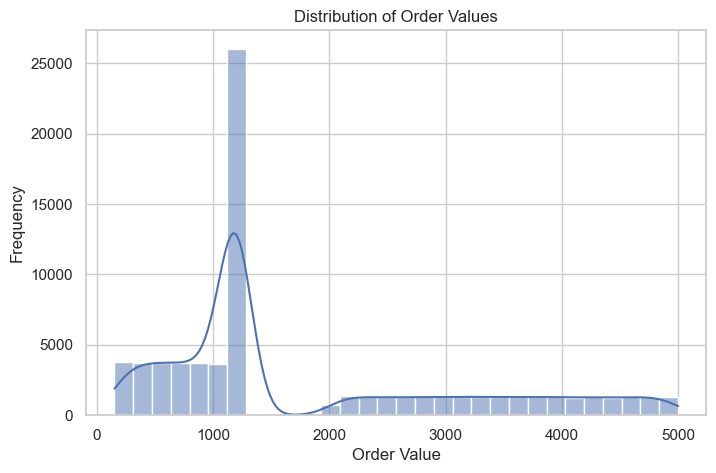

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Order_Value'], bins=30, kde=True)
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()


Insight:
Identifies customer spending behavior
Detects skewness and high-value orders

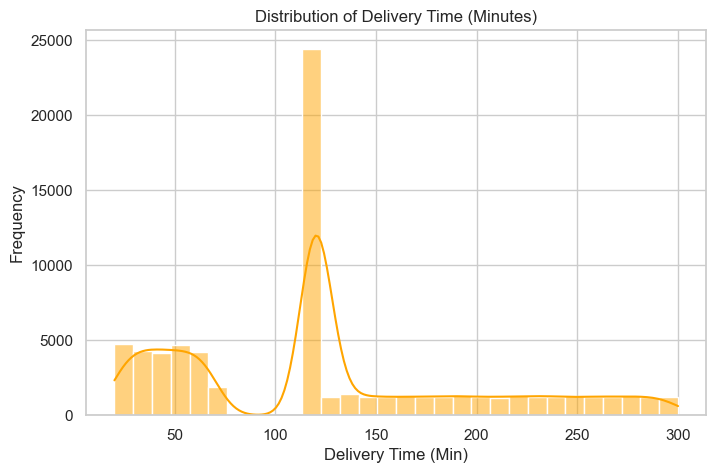

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time_Min'], bins=30, kde=True, color="orange")
plt.title("Distribution of Delivery Time (Minutes)")
plt.xlabel("Delivery Time (Min)")
plt.ylabel("Frequency")
plt.show()


Insight:
Helps identify delayed deliveries

Supports delivery performance analysis

city wise order analysis:

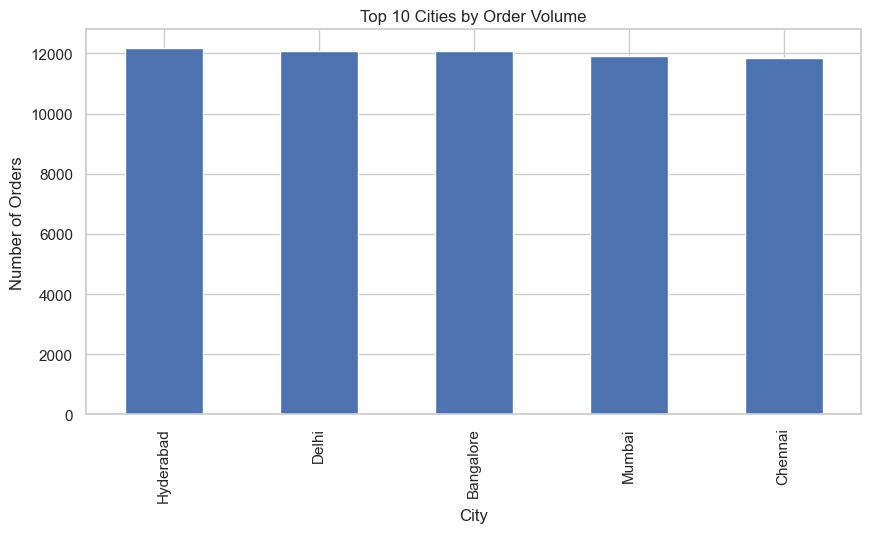

In [7]:
city_orders = df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
city_orders.plot(kind='bar')
plt.title("Top 10 Cities by Order Volume")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.show()


cuisine -wise order analysis:

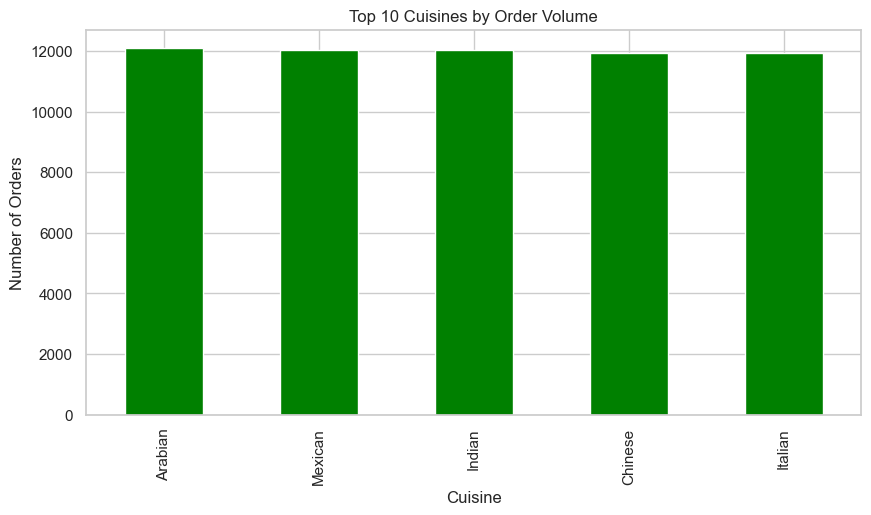

In [8]:
cuisine_orders = df['Cuisine_Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
cuisine_orders.plot(kind='bar', color='green')
plt.title("Top 10 Cuisines by Order Volume")
plt.xlabel("Cuisine")
plt.ylabel("Number of Orders")
plt.show()


Insight:
Reveals popular cuisines


Distance and Delivery Relationship:

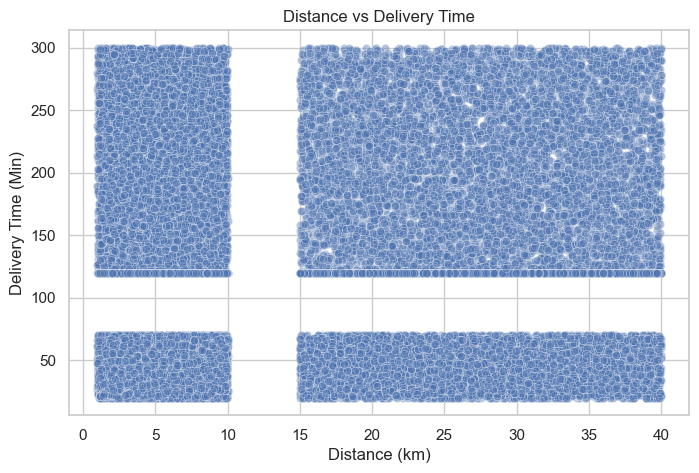

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Distance_km',
    y='Delivery_Time_Min',
    data=df,
    alpha=0.4
)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (Min)")
plt.show()


Insight:
Shows correlation between distance and delivery time delays
Identifies operational inefficiencies

Cancellelation Reason analysis:

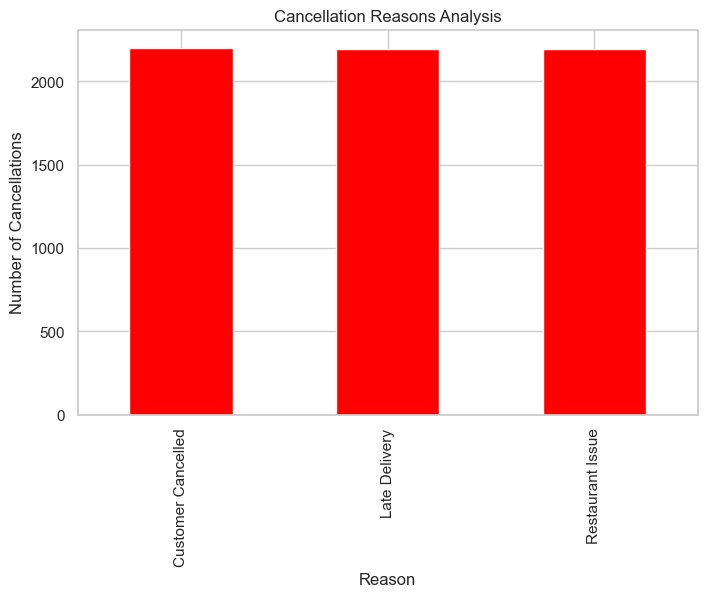

In [16]:
cancel_df = df[df['Order_Status'] == 'Cancelled']

cancel_reason_counts = cancel_df['Cancellation_Reason'].value_counts()

plt.figure(figsize=(8,5))
cancel_reason_counts.plot(kind='bar', color='red')
plt.title("Cancellation Reasons Analysis")
plt.xlabel("Reason")
plt.ylabel("Number of Cancellations")
plt.show()


In [19]:
print(df.columns.tolist())

['Order_ID', 'Customer_ID', 'Customer_Age', 'Customer_Gender', 'City', 'Area', 'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type', 'Order_Date', 'Order_Time', 'Delivery_Time_Min', 'Distance_km', 'Order_Value', 'Discount_Applied', 'Final_Amount', 'Payment_Mode', 'Order_Status', 'Cancellation_Reason', 'Delivery_Partner_ID', 'Delivery_Rating', 'Restaurant_Rating', 'Order_Day', 'Peak_Hour', 'Profit_Margin']


Correlation Analysis (Numeric Features):

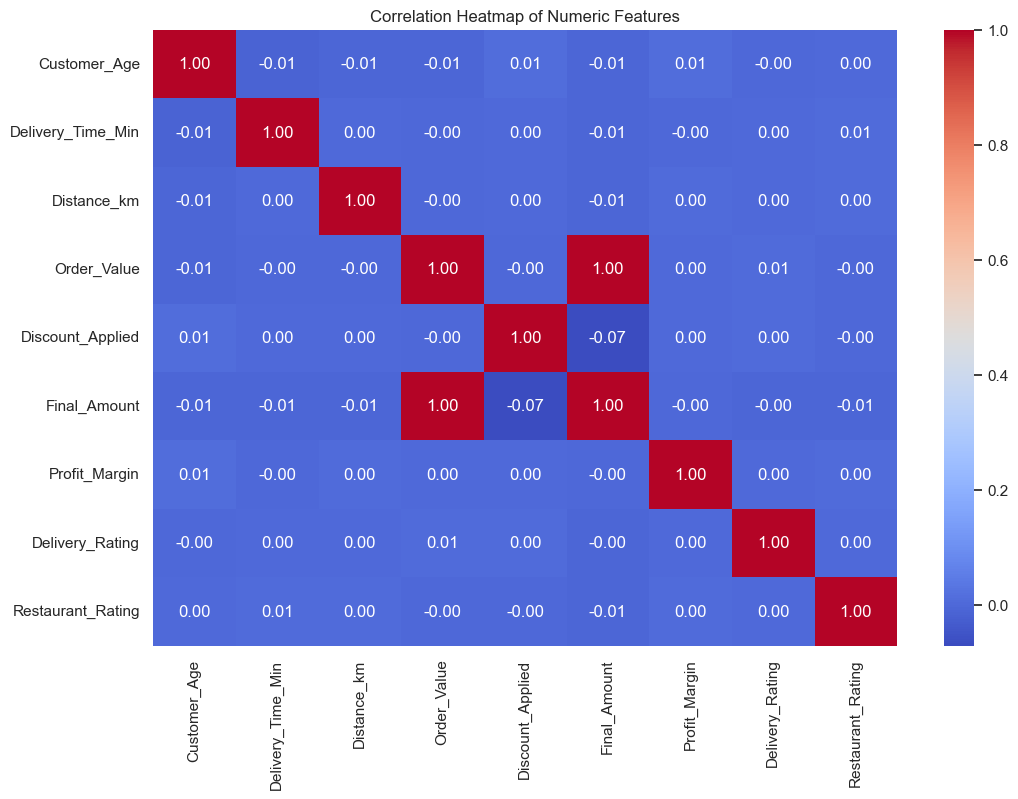

In [ ]:
# df = pd.read_csv("/Users/jein/env/env/online_food_delivery/cleaned_data.csv")
numeric_cols = [
    'Customer_Age',
    'Delivery_Time_Min',
    'Distance_km',
    'Order_Value',
    'Discount_Applied',
    'Final_Amount',
    'Profit_Margin',
    'Delivery_Rating',
    'Restaurant_Rating'
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Statistics Summary:

In [26]:
df.describe()

,Customer_Age,Delivery_Time_Min,Distance_km,Order_Value,Discount_Applied,Final_Amount,Delivery_Rating,Restaurant_Rating,Profit_Margin
count,35936.000000,72267.000000,48146.000000,72267.000000,60164.000000,32002.000000,51131.000000,61319.000000,72267.000000
mean,38.942425,124.946781,16.438852,1783.550362,94.286118,1951.682770,2.991453,4.199079,0.247469
std,12.366708,74.174767,12.278105,1333.534386,108.474411,1554.958761,1.415204,0.653915,0.145498
min,18.000000,20.000000,1.000000,150.000000,0.000000,-150.000000,1.000000,3.000000,0.000000
25%,28.000000,58.000000,5.420000,932.000000,20.000000,555.000000,2.000000,3.600000,0.120000
50%,39.000000,120.000000,9.950000,1197.000000,50.000000,1142.500000,3.000000,4.200000,0.250000
75%,50.000000,165.000000,27.490000,2735.000000,100.000000,3358.000000,4.000000,4.900000,0.370000
max,60.000000,300.000000,40.000000,5000.000000,300.000000,4980.000000,5.000000,5.000000,0.500000


Feature Engineering:

In [27]:
import pandas as pd
import numpy as np


In [28]:
df = pd.read_csv("/Users/jein/env/env/online_food_delivery/cleaned_data.csv")

print("Before Feature Engineering:", df.shape)
df.head()

Before Feature Engineering: (72267, 25)


,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,Order_Time,Delivery_Time_Min,Distance_km,Order_Value,Discount_Applied,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
0,ORD000001,CUST6948,19.0,Male,NaN,Central,RES936,Restaurant_29,Chinese,10/20/2024,0:00,187.0,15.75,1197.0,NaN,NaN,UPI,Delivered,NaN,DP563,5.0,4.4,Weekend,True,0.13
1,ORD000002,CUST6515,NaN,Female,Chennai,North,RES689,Restaurant_419,Chinese,08/12/24,0:00,20.0,29.50,4869.0,20.0,4849.0,COD,Delivered,NaN,DP369,5.0,4.7,Weekday,True,0.48
2,ORD000003,CUST1765,NaN,Male,Delhi,NaN,RES723,Restaurant_244,Arabian,12/08/24,0:00,207.0,NaN,757.0,20.0,737.0,Wallet,Delivered,NaN,DP580,4.0,4.9,Weekend,True,0.08
3,ORD000004,CUST2744,NaN,Male,Mumbai,Central,RES951,Restaurant_178,Chinese,10/08/24,0:00,143.0,15.68,1197.0,NaN,NaN,UPI,Cancelled,Late Delivery,DP155,NaN,NaN,Weekday,NaN,0.04
4,ORD000005,CUST4389,57.0,Female,Chennai,South,RES419,Restaurant_262,Chinese,02/04/24,0:00,51.0,9.60,372.0,20.0,352.0,Card,Delivered,NaN,DP728,2.0,4.4,Weekend,False,0.12


Order Day Type (Weekday / Weekend):

In [29]:
df['Day_Type'] = df['Order_Day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)


<!-- Peak Hour Indicator:
Peak hours assumed:
Lunch: 12 PM – 2 PM
Dinner: 7 PM – 10 PM -->

Profit Margin Percentage

In [41]:
df['Profit_Margin_Pct'] = np.where(
    df['Final_Amount'] > 0,
    (df['Profit_Margin'] / df['Final_Amount']) * 100,
    0
)


Delivery Performance Categories
Categories:
Fast: ≤ 30 minutes
On-Time: 31–45 minutes
Delayed: > 45 minutes

In [42]:
df['Delivery_Performance'] = pd.cut(
    df['Delivery_Time_Min'],
    bins=[0, 30, 45, 1000],
    labels=['Fast', 'On-Time', 'Delayed']
)


Customer Age Groups:

In [43]:
df['Age_Group'] = pd.cut(
    df['Customer_Age'],
    bins=[17, 25, 35, 45, 100],
    labels=['18-25', '26-35', '36-45', '46+']
)


Post-Feature Engineering Validation:

In [ ]:

new_features = [
    'Day_Type',
    'Profit_Margin_Pct',
    'Delivery_Performance',
    'Age_Group'
]

df[new_features].head()


,Day_Type,Profit_Margin_Pct,Delivery_Performance,Age_Group
0,Weekday,0.000000,Delayed,18-25
1,Weekday,0.009899,Fast,NaN
2,Weekday,0.010855,Delayed,NaN
3,Weekday,0.000000,Delayed,NaN
4,Weekday,0.034091,Delayed,46+


In [45]:
# Null check for engineered features
df[new_features].isnull().sum()


Day_Type                    0
Profit_Margin_Pct           0
Delivery_Performance        0
Age_Group               36331
dtype: int64

In [46]:
df.to_csv("final_analytical_data.csv", index=False)

print("After Feature Engineering:", df.shape)


After Feature Engineering: (72267, 29)
